In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.chdir('BayesHI')
import bayeshi

In [2]:
model = bayeshi.load_model('LSTMSequenceToSequence')

Loading data for simulation 300
Spectra shape: (256, 350, 512), Temperature shape: (350, 512, 512)
Spectra reshaped to: (179200, 256), Temperature reshaped to: (179200, 512)


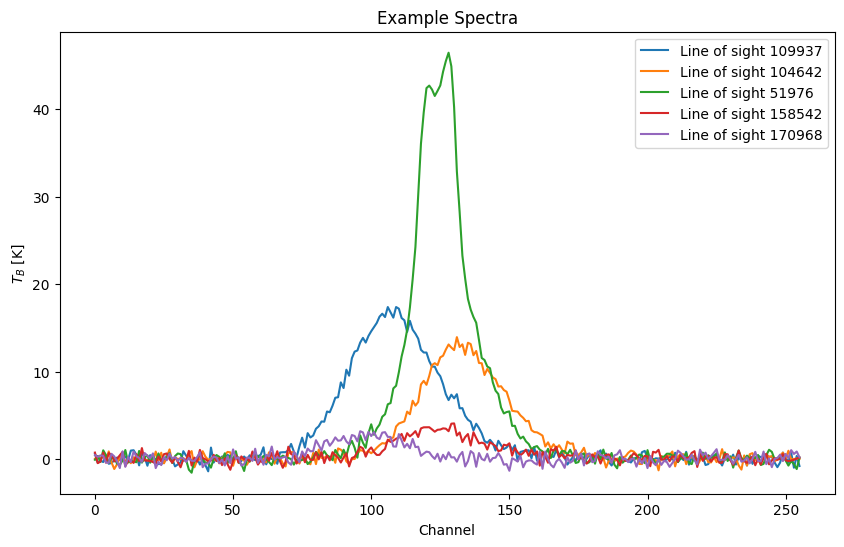

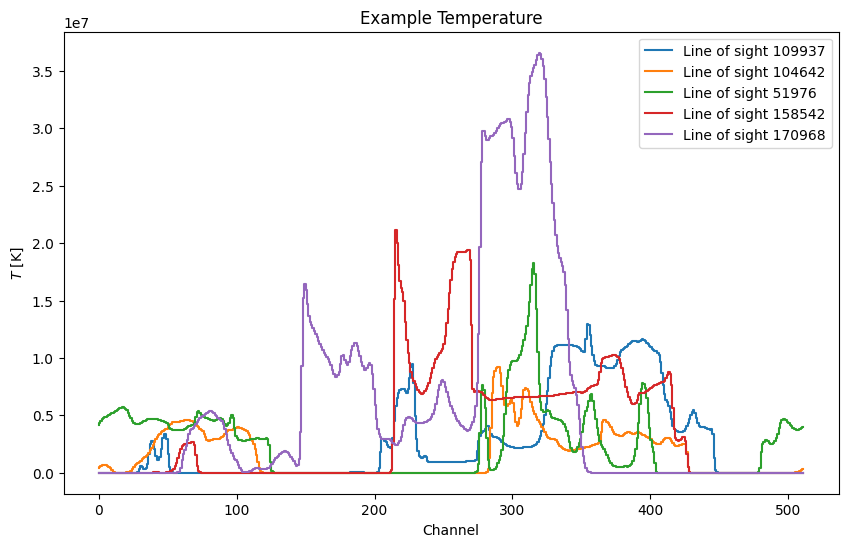

Removed 0 lines of sight with NaNs
Splitting data into train, validation, and test sets with sizes: train=60%, val=20%, test=20%


In [3]:
train_loader, val_loader, test_loader = bayeshi.load_tigress_temp_data(sim_number = '300', show_example=True)

In [4]:
if os.path.exists('/home/120/em8117/lstm_temp.pth'):
    model.load_weights('/home/120/em8117/lstm_temp.pth')
else:
    train_errors, val_errors, *_ = model.fit(train_loader, val_loader, '/home/120/em8117/lstm_temp.pth', nEpochs=50)
    plt.figure(figsize=(10,4))
    plt.plot(train_errors, label='Train')
    plt.plot(val_errors, label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.show()

Training Model
Initial learning rate: [0.001]


/home/120/em8117/.local/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([32, 512])) that is different to the input size (torch.Size([32, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (256) must match the size of tensor b (512) at non-singleton dimension 1

In [28]:
# Predict on test set
predictions = model.predict(test_loader).cpu().numpy()

In [29]:
x_test = np.array([x[0] for x in test_loader]).reshape(-1,256)
y_test = np.array([x[1] for x in test_loader]).reshape(-1,256)